## Data preparation
### Lecture 
The original dataset has been transformed after an important preprocessing step in this [notebook](https://github.com/wikistat/Exploration/blob/master/GRC-carte_Visa/Explo-R-Visa.ipynb). We skip this step today! 

In [3]:
# Library Importation.
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
# Lecture of the data frame
df = pd.read_table('vispremv.dat', delimiter=' ')
#Give the size of the dataset

In [5]:
# Produce a list of quantitative variables
df.describe()

,RELAT,AGER,OPGNBL,MOYRVL,TAVEPL,ENDETL,GAGETL,GAGECL,GAGEML,KVUNB,...,UEMNB,XLGNB,XLGMTL,YLVNB,YLVMTL,ROCNB,NPTAG,ITAVCL,HAVEFL,JNBJDL
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,...,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,132.574788,42.573848,0.627211,2.371296,6.715418,0.827903,4.477338,1.868891,2.394713,1.028222,...,1.468485,0.649106,4.161701,0.760113,4.726685,8.564440,0.136406,9.373976,3.043170,1.189791
std,93.499830,11.912343,0.685315,1.464376,4.907295,1.279475,5.473534,3.680483,4.540024,0.501554,...,1.280262,0.794352,5.205502,0.782235,4.662683,11.738092,0.379837,3.313518,4.665580,1.587594
min,-2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.500000,33.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.067305,0.000000,0.000000
50%,130.000000,43.000000,0.693147,2.564949,8.652248,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,4.882802,2.000000,0.000000,10.075969,0.000000,0.000000
75%,204.500000,52.000000,1.098612,3.349750,10.962298,1.945910,10.483833,0.000000,0.000000,1.000000,...,2.000000,1.000000,10.033572,1.000000,9.651494,14.000000,0.000000,11.649131,6.216606,2.441401
max,393.000000,65.000000,3.367296,7.451242,13.785052,4.605170,15.060512,13.123924,14.296852,4.000000,...,9.000000,4.000000,13.270100,4.000000,13.785052,69.000000,4.000000,16.045468,15.770893,4.905275


**Q** Verify that most of the variables are described by a quantitative and a qualitative version.

**Q** Qualitative variables  (sexe, csp, famille)  are transformed into quantitative ones except `CARVP`. How? 

In [6]:
df.dtypes.head(10)

SEXEQ     object
FAMIQ     object
PCSPQ     object
kvunbq    object
vienbq    object
uemnbq    object
xlgnbq    object
ylvnbq    object
rocnbq    object
nptagq    object
dtype: object

In [7]:
# Transformation of qualitative variables into quantitative 0/1 ones.
vispremDum = pd.get_dummies(df[["SEXEQ", "FAMIQ", "PCSPQ"]])
vispremDum.drop(["SEXEQ_Sfem", "FAMIQ_Fcou"], axis=1, inplace=True)

# Aggregation of the previous variables with numeric ones
vispremNum = vispremDum.select_dtypes(exclude = ['object'])
vispremR = pd.concat([vispremDum, vispremNum], axis=1)

**Q** How many samples and how many variables?

In [8]:
#TODO Compute the number of samples and the number of variables
print(f" Number of samples : {vispremR.shape[0]} \n Number of variables : {vispremR.shape[1]}")

 Number of samples : 1063 
 Number of variables : 14


In [9]:
# The variable CARVP is modified into 0/1
df["CARVP"] = df["CARVP"].map(lambda x: 0 if x=="Cnon" else 1)
df["CARVP"]

148009     1
552427     1
556005     1
556686     1
642680     1
          ..
7567726    0
7572458    0
7574479    0
7580358    0
7589439    0
Name: CARVP, Length: 1063, dtype: int64

### Extraction of the learning and test set

In [10]:
rd_seed = 123 # Modify this sieve initialization
npop = len(df)

#TODO Find xApp,xTest,yApp,yTest with the help of train_test_split
#We will place 200 samples in the test set

x_vars = vispremR
y_var = df[["CARVP"]]
xApp, xTest, yApp, yTest = train_test_split(x_vars, y_var, test_size = 200, random_state = rd_seed)

## [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)
This "old" method is still commonly used, mainly because of its simplicity, interpretability and diffusion over years.

### Estimation and optimization
The model selection procedure involves a statistical penalization: *ridge*, Lasso or a combination of both (*elastic net*). The behaviour of the model selection in Python is not exactly comparable with the one used in R (*stepwise, backward, forward*) that optimizes *AIC*

#### *Lasso* Optimization


We first consider the **Lasso** penalty, which is proportional to the L1 norm of the parameter we are looking for. This penalty induces sparsity of the response coefficient vector.

In [11]:
# Convert y into a 1D array
yApp = np.array(yApp["CARVP"])
yTest = np.array(yTest["CARVP"])

In [12]:
from sklearn.linear_model import LogisticRegression
# Grid of penalty parameters
param = [{"C": [0.5, 1, 5, 10, 12, 15, 30]}] # dictionary of the values of C used for GridSearchCV
# TODO
# 1. Define a model (logistic regression)
# 2. Use the penalty="l1"
# 3. Use GridSearchCV to obtain automatically the best regularization parameter 
# 4. In what follows, this method will be denoted by logitLasso !

logit_model = LogisticRegression(penalty="l1", solver="liblinear")

grid_search_cv = GridSearchCV(logit_model, param, cv=5)

logitLasso = grid_search_cv.fit(xApp, yApp)

In [13]:
# Computation of the loss
print("Best learning rate = %f, Best parameter  = %s" %
      (1.-logitLasso.best_score_, logitLasso.best_params_))

Best learning rate = 0.231758, Best parameter  = {'C': 0.5}


Prediction error


In [14]:
# Prediction with the model
yChap_lasso = logitLasso.predict(xTest)
# TODO:  compute the  confusion matrix with the help of pd.crosstab

confusion_matrix_lasso = pd.crosstab(yTest, yChap_lasso, colnames=["prediction"], rownames=["true value"])
print(confusion_matrix_lasso, "\n")

# Error on the test set
print("Test error - Logistic regression  Lasso = %f" % (1-logitLasso.score(xTest, yTest)))

prediction    0   1
true value         
0           105  29
1            30  36 

Test error - Logistic regression  Lasso = 0.295000


#### *Ridge* Optimization 
On considère maintenant l'optimisation Ridge, ou la pénalité est proportionnelle à la norme 2 de l'estimateur (au carré)


In [15]:
# Grid of penalty parameters
param=[{"C":[0.5,1,5,10,12,15,30]}]
# TODO
# 1. Define a model (logistic regression)
# 2. Use the penalty="l2"
# 3. Use GridSearchCV to obtain automatically the best regularization parameter 
# 4. In what follows, this method will be denoted by logitRidge!

logit_model_ridge = LogisticRegression(penalty="l2")

gs_cv_ridge= GridSearchCV(logit_model_ridge, param, cv=5)

logitRidge = gs_cv_ridge.fit(xApp, yApp)

In [16]:
# Error computation  
print("Best score = %f, Best parameter = %s" %
      (1. - logitRidge.best_score_, logitRidge.best_params_))

Best score = 0.231758, Best parameter = {'C': 0.5}


In [17]:
# Prediction 
yChap_ridge = logitRidge.predict(xTest)

#Todo confusion matrix 

confusion_matrix_ridge = pd.crosstab(yTest, yChap_ridge, colnames=["prediction"], rownames=["true value"])
print(confusion_matrix_ridge, "\n")

# Error on the test set
print("Erreur de test régression Ridge = %f" % (1-logitRidge.score(xTest, yTest)))

prediction    0   1
true value         
0           105  29
1            30  36 

Erreur de test régression Ridge = 0.295000


**Q** <font color='red'>
    Note the prediction errors and compare them with the ones predicted by the cross validation step
</font>

Both test errors for Lasso and Ridge are equal, with a value of 29.5%. This is due to the fact than the number of parameters is lower than the amount of observations : 𝑝  is lower than  𝑛.
The situation here is not of high dimensionality, which makes Ridge and Lasso equivalent.

### Interpretation

LassoOpt produced by GridSearchCV does not record the values of the parameters learnt by the model. It is then necessary to launch another time this model with the optimal value of the parameter if we wish to show the values of the coefficients.

In [18]:
LassoOpt = LogisticRegression(penalty="l1", solver="liblinear", C=12)
LassoOpt = LassoOpt.fit(xApp, yApp)

# Storage of the coefficients
vect_coef = np.matrix.transpose(LassoOpt.coef_)
vect_coef = vect_coef.ravel()

#Show the most important 25 coefficients
coef = pd.Series(abs(vect_coef),index=xApp.columns).sort_values(ascending=False)
print(coef)

PCSPQ_Pcad    2.640266
PCSPQ_Psan    2.300845
PCSPQ_Pouv    1.271194
SEXEQ_Shom    1.043405
SEXEQ_Shom    0.563999
PCSPQ_Pcad    0.523962
PCSPQ_Pemp    0.350497
FAMIQ_Fseu    0.059853
PCSPQ_Pemp    0.055094
PCSPQ_Pouv    0.045966
FAMIQ_Fseu    0.045104
PCSPQ_Pint    0.000000
PCSPQ_Psan    0.000000
PCSPQ_Pint    0.000000
dtype: float64


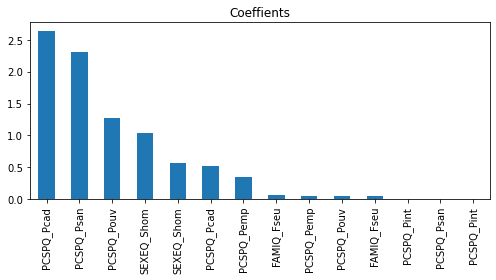

In [19]:
plt.figure(figsize=(7,4))
coef.plot(kind='bar')
plt.title('Coeffients')
plt.tight_layout()
plt.show()

**Q** <font color='red'>
    What are the important variables? How to draw some conclusion/interpretation?
</font>

The most important variables are the socio-professional category and the sex variables.
Male managers are the most likely to own a VISA Premium credit card. This is probably due to male overrepresentation in management roles. Obviously, managers are usually wealthier than people in other positions, which makes them more likely to own a premium credit card.


**Q** <font color='red'>
    Is the Lasso penalty efficient?
</font>

Once again, Lasso yields the same results as Ridge. Through "shrinkage", Lasso favors sparse and simple models which reduces the complexity of our model, making it easier to interpret. However, this has a cost: bias is increased.
Lasso seems to be mildly efficient with around 70% accuracy.

### Roc Curve

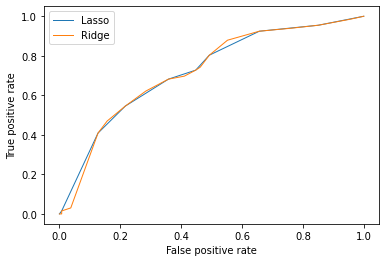

In [20]:
from sklearn.metrics import roc_curve
listMethod=[["Lasso",logitLasso],["Ridge",logitRidge]]

for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="best")
plt.show()

## Discriminant analysis
Three methods are availables: parametric ones with LDA-QDA and a non parametric one (*k* nearest neighbor).

In [21]:
from sklearn import discriminant_analysis
from sklearn.neighbors import KNeighborsClassifier

### Linear Discriminant Analysis (LDA)
Estimation of the model (there is no feature selection step) and then prediction over the test set.

In [22]:
# TODO:
# 1. Define the model ('lda' as discriminant_analysis.LinearDiscriminantAnalysis)
# 2. Fit the model
# 3. Predict on the test set
# 4. Compute the confusion matrix

disLin = discriminant_analysis.LinearDiscriminantAnalysis().fit(xApp, yApp)

yChap_disLin = disLin.predict(xTest)

confusion_matrix_disLin = pd.crosstab(yTest, yChap_disLin, colnames=["prediction"], rownames=["true value"])
print(confusion_matrix_disLin, "\n")

# Prediction on the test set
print("Erreur de test disLin = %f" % (1-disLin.score(xTest, yTest)))

prediction    0   1
true value         
0           105  29
1            30  36 

Erreur de test disLin = 0.295000


**Q** <font color='red'>
    What about the quality of the prediction? The ability of interpret the method?
</font>


The quality of the prediction is exactly the same as with Lasso, Ridge and Elastic net in terms of metrics. Still, the interpretability is rather trickier than previously since the method involves Bayesian probability theory and "reversed learning" so-to-speak.

**Q** <font color='red'>
    What is the meaning of the  *warning*? What are the variables involved by this warning?
</font>

The warning is about colinearity. This is due to our model having dummy variables. Take the sex variable for example: we have one variable for male and another for female. When one is equal to 1, the other is obviously 0. Therefore, one's value is directly linked to the other's. The concerned variables are thus all the dummies.
High colinearity makes our covariance matrix's eigenvalues close to 0. This translates to large values for the inverse of said-matrix, meaning that the variances will be through the roof.

### Quadratic Discriminant Analysis (QDA)

In [23]:
# TODO:
# 1. Define the model ('disQua' as discriminant_analysis.quadraticDiscriminantAnalysis)
# 2. Fit the model
# 3. Predict on the test set
# 4. Compute the confusion matrix

disQua = discriminant_analysis.QuadraticDiscriminantAnalysis().fit(xApp, yApp)

yChap_disQua = disQua.predict(xTest)

confusion_matrix_disQua = pd.crosstab(yTest, yChap_disQua, colnames=["prediction"], rownames=["true value"])
print(confusion_matrix_disQua, "\n")

# Prediction on the test set
print("Erreur de test disQua = %f" % (1-disQua.score(xTest, yTest)))

prediction    0
true value     
0           134
1            66 

Erreur de test disQua = 0.330000


C:\Users\Poste-PC\miniconda3\envs\math4ml\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### K Nearest Neighbors

In [24]:
# TODO
# 1. Define the model with the 10 nearest neighbors (use KNeighborsClassifier)
# 2. Fit the model
# 3. Predict on the test set
# 4. Show the confusion matrix 

disKnn = KNeighborsClassifier(n_neighbors=10).fit(xApp, yApp)

yChap_disKnn = disKnn.predict(xTest)

confusion_matrix_disKnn = pd.crosstab(yTest, yChap_disKnn, colnames=["prediction"], rownames=["true value"])
print(confusion_matrix_disKnn, "\n")

# Prediction error on the test set
print("Erreur de test disKnn = %f" % (1-disKnn.score(xTest,yTest)))

prediction    0   1
true value         
0           113  21
1            35  31 

Erreur de test disKnn = 0.280000


In [25]:
#Optimization of the smoothing parameter (number of neighbors) k
#Grid 
param_grid=[{"n_neighbors":list(range(1, 15))}]
disKnn=GridSearchCV(KNeighborsClassifier(), param_grid,cv=5,n_jobs=-1)

disKnnOpt=disKnn.fit(xApp, yApp) # GridSearchCV is itself an estimator 

# Optimal parameter 
disKnnOpt.best_params_["n_neighbors"]
print("Best score = %f, Best parameter = %s" % (1.-disKnnOpt.best_score_,disKnnOpt.best_params_))

Best score = 0.229446, Best parameter = {'n_neighbors': 7}


In [26]:
# Prediction on the test set 
yChap_knn7 = disKnnOpt.predict(xTest)
# Confusion matrix 
table=pd.crosstab(yChap_knn7, yTest)
print(table)

# Estimation of the prediction error on the test set 
print("Error rate of knn_opt = %f" % (1-disKnnOpt.score(xTest,yTest)))

col_0    0   1
row_0         
0      105  30
1       29  36
Error rate of knn_opt = 0.295000


ROC curve

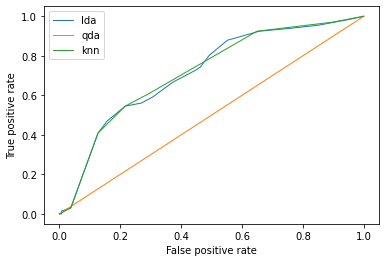

In [27]:
from sklearn.metrics import roc_curve
# List of the methods 
listMethod=[["lda", disLin],["qda", disQua],["knn", disKnnOpt]]

# Curves computation
for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="best")
plt.show()

## [Binary decision trees](https://en.wikipedia.org/wiki/Decision_tree_learning)
Binary trees are competing well versu logistic regression and are commonly used in datascience. In particular, their interpretation are simple, which is a great advantage of this method. However, the optimization of the parameters involved in this method is somewhat versatile.

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
# Define and fit the model
# TODO

dtc = DecisionTreeClassifier()

dtc_fit = dtc.fit(xApp, yApp)

**Q** <font color='red'>
    What is the default homogeneity criterion used by this method?
</font>

The default criterion for homogeneity is Gini, which refers to the Gini Index. The only other option is Entropy, referring to the gain ratio. Both of these are used to evaluate the quality of splits between the data.

**Q** <font color='red'>
    What is the major drawback of the pruning step in  `Scikkit-learn` when compared to the  `rpart` library in R?
</font>

The RPART library lets you chose the complexity parameter for pruning while SKLEARN does not have such a criterion, only Gini and Entropy. However, the latter has the parameter "ccp_alpha" which represents some kind of threshold for the cost-complexity of a subtree. In other words, the subtree with the largest cost complexity that is smaller than said-parameter will be chosen.

In [30]:
# Optimization of the depth of the tree
#TODO

tree_params=[{"criterion": ["gini", "entropy"]}]
tree_cv = GridSearchCV(dtc, tree_params, cv=5, n_jobs=-1)

treeOpt = tree_cv.fit(xApp, yApp)

# optimal parameter
treeOpt.best_params_["criterion"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_, treeOpt.best_params_))

Meilleur score = 0.244495, Meilleur paramètre = {'criterion': 'gini'}


In [51]:
# Prediction on the test set
yChap_tree = treeOpt.predict(xTest)

# Confusion matrix
table = pd.crosstab(yChap_tree, yTest, colnames=["true value"], rownames=["prediction"])
print(table, "\n")

# Prediction error on the test set
print(" Prediction error on the test set = %f" % (1-treeOpt.score(xTest,yTest)))

true value    0   1
prediction         
0           113  35
1            21  31 

 Prediction error on the test set = 0.280000


In [42]:
# Visualization
from sklearn.tree import export_graphviz
import io
import pydotplus

treeG = DecisionTreeClassifier(criterion=treeOpt.best_params_['criterion'])
treeG.fit(xApp,yApp)
dot_data = io.StringIO()

export_graphviz(treeG, out_file=dot_data) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("treeOpt.png")

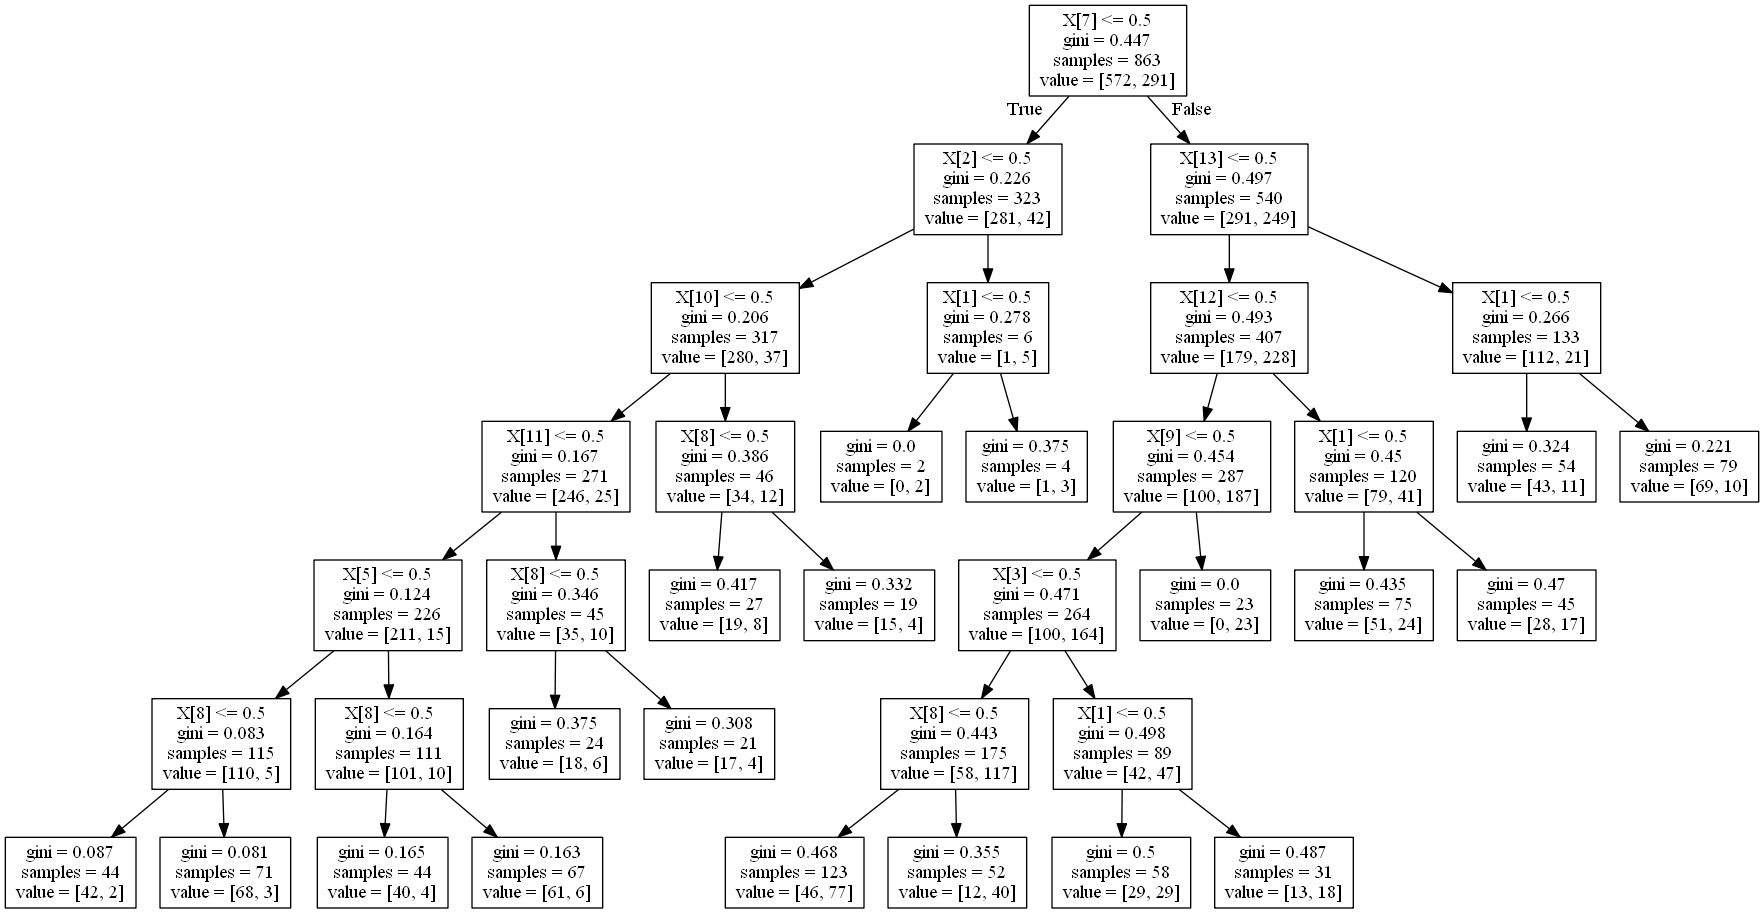

In [43]:
from IPython.display import Image
Image(filename='treeOpt.png')

### [Roc curve ROC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)
Comparison of the previous methods

The default threshold   (0.5) is not necessarily the best one, and it is necessary to compare the ROC curves.

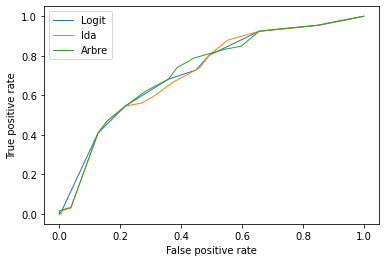

In [44]:
# Liste of the  methods 
listMethod=[["Logit",logitLasso],["lda",disLin],["Arbre",treeOpt]]

# Roc curves 
for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="best")
plt.show()

Comment the results.

**Q** <font color='red'>
    Interest of the logistic regression when compared to the LDA?
</font>

**Q** <font color='red'>
    Consequence of the ROC curve crossing on the AUC evaluation?
</font>

The size of the test set (200) is modest...

## [Aggregation methods](https://en.wikipedia.org/wiki/Ensemble_learning)
We mainly compare here the three algorthms: *bagging, random forest, boosting*.

### *Bagging*

**Q** <font color='red'>
    What is the default aggregated algorithm? 
</font>

The default aggregated algorithm for bagging is a decision tree.


**Q** <font color='red'>
    What is the default number of estimators ? Is it necessary to optimize this number?
</font>

The default number of estimators is 10 which is equivalent to the number of trees for the Decision Tree classifier.
It is necessary to optimize this number because 10 is small and we should increase the number of trees until the model performance stabilizes.

In [50]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(n_estimators=100)
bagC = bag.fit(xApp, yApp)

# Prediction on the test set
yChap_bag = bagC.predict(xTest)

# Confusion matrix
table = pd.crosstab(yChap_bag, yTest, colnames=["true value"], rownames=["prediction"])
print(table, "\n")

# Prediction error on the test set
print("Prediction error with bagging = %f" % (1-bagC.score(xTest,yTest)))

True Values    0   1
Predictions         
0            113  35
1             21  31 

Prediction error with bagging = 0.280000


**Q** Run this previous cell several times. What do you think about the stability of the method and about the its reliability?

### *Random forest*

**Q** What is the parameter to be optimized for this algorithm? What is its default value?

**Q** Is the number of trees a versatile parameter?

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
# Optimization  of max_features
param=[{"max_features":list(range(2,10,1))}]

# TODO DEF gridsearchCV
rf = GridSearchCV(RandomForestClassifier(), param, cv=5)
rfOpt = rf.fit(xApp, yApp)

# optimal parameter 
print("Best score = %f, Best parameter = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Best score = 0.235247, Best parameter = {'max_features': 8}


In [57]:
# Prediction on the test set
yChap_rf = rfOpt.predict(xTest)

# Confusion matrix
table = pd.crosstab(yChap_rf, yTest, colnames=["true value"], rownames=["prediction"])
print(table, "\n")

# Prediction error on the test set
print("Prediction error with random forest opt -quantitative = %f" % (1-rfOpt.score(xTest,yTest)))

true value    0   1
prediction         
0           113  35
1            21  31 

Prediction error with  random forest opt -quantitative = 0.280000


### *Gradient boosting*

**Q** What is the historical *boosting* algorithm? Which one is used now?

**Q** What are the important parameters to be tuned? How to calibrate them??

**Q** What is the default value of the parameter that is not optimized below?

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
# Optimization of two parameters
paramGrid = [
  {'n_estimators': list(range(100,601,50)), 'learning_rate': [0.1,0.2,0.3,0.4]}
 ]
gbmC = GridSearchCV(GradientBoostingClassifier(),paramGrid,cv=5,n_jobs=-1)
gbmOpt = gbmC.fit(xApp, yApp)

# Optimal parameters
print("Best score = %f, Best parameters = %s" % (1. - gbmOpt.best_score_,gbmOpt.best_params_))

Best score = 0.236403, Best parameters = {'learning_rate': 0.1, 'n_estimators': 100}


In [60]:
# Prediction on the test set
yChap_gbmC = gbmOpt.predict(xTest)

# Confusion matrix
table = pd.crosstab(yChap_gbmC, yTest, rownames=["prediction"], colnames=["true value"])
print(table, "\n")

# Prediction error on the test set
print("Test error of gbm opt = %f" % (1-gbmOpt.score(xTest,yTest)))

true value    0   1
prediction         
0           105  30
1            29  36 

Test error of gbm opt = 0.295000


### Courbes ROC

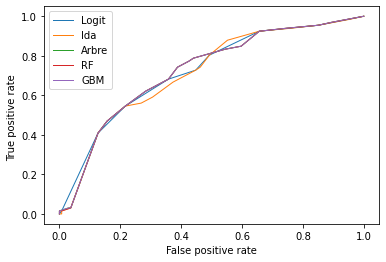

In [62]:
# List of the methods
listMethod=[["Logit",logitLasso],["lda",disLin],["Arbre",treeOpt],["RF",rfOpt],["GBM",gbmOpt]]

# ROC curves computation 
for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate ')
plt.legend(loc="best")
plt.show()

**Q** What is the best interpretable method? What is the best method?

**Q** What can you say about the *extrem gradient boosting* ? Number of parameters to be tuned? In Python? In R? Its diffusion?

# SVM

In [70]:
from sklearn.svm import SVC
# Optimization of two parameters
paramGrid = [
  {'kernel': ["linear", "poly", "rbf"], 'C': [0.1, 0.5, 1, 2]}
]
svc_model = GridSearchCV(SVC(), paramGrid, cv=5, n_jobs=-1)
svcOpt = svc_model.fit(xApp, yApp)

# Optimal parameters
print("Best score = %f, Best parameters = %s" % (1. - svcOpt.best_score_, svcOpt.best_params_))

Best score = 0.231758, Best parameters = {'C': 0.5, 'kernel': 'linear'}


In [71]:
# Prediction on the test set
yChap_svc = svcOpt.predict(xTest)

# Confusion matrix
table = pd.crosstab(yChap_svc, yTest, rownames=["prediction"], colnames=["true value"])
print(table, "\n")

# Prediction error on the test set
print("Test error of SVM opt = %f" % (1-svcOpt.score(xTest, yTest)))

true value    0   1
prediction         
0           105  30
1            29  36 

Test error of SVM opt = 0.295000


# Neural Networks

In [65]:
from sklearn.neural_network import MLPClassifier
# Optimization of two parameters
paramGrid = [{
    'hidden_layer_sizes': [(5, 2), (10, 5), (50, 10)],
    'activation': ["identity", "relu", "logistic"],
   'solver': ["lbfgs", "sgd", "adam"],
    "alpha": [1e-5, 1e-10, 1e-15]
}]
mlp = GridSearchCV(MLPClassifier(), paramGrid, cv=5, n_jobs=-1)
mlpOpt = mlp.fit(xApp, yApp)

# Optimal parameters
print("Best score = %f, Best parameters = %s" % (1. - mlpOpt.best_score_, mlpOpt.best_params_))

Best score = 0.231745, Best parameters = {'activation': 'identity', 'alpha': 1e-15, 'hidden_layer_sizes': (10, 5), 'solver': 'sgd'}


In [67]:
# Prediction on the test set
yChap_mlp = mlpOpt.predict(xTest)

# Confusion matrix
table = pd.crosstab(yChap_mlp, yTest, rownames=["prediction"], colnames=["true value"])
print(table, "\n")

# Prediction error on the test set
print("Test error of MLP opt = %f" % (1-mlpOpt.score(xTest, yTest)))

true value    0   1
prediction         
0           105  30
1            29  36 

Test error of MLP opt = 0.295000
